# Numerical Optimization with Large Scale Linear Algebra : Assignment 3 - Pagerank
- Name : Vyronas Katsos
- email : vyr.katsos@aueb.gr
- MSc in Data Science (part-time)
- p3352309

## a - Find the vector π 

### i - Find the vector π with the Power Method

## Import the required libraries for our tasks and assignment

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from scipy import sparse
from scipy.sparse import csr_matrix,csc_matrix
from scipy.sparse.linalg import splu
from scipy.sparse import identity, tril, triu
from sklearn.preprocessing import MinMaxScaler
import time


In [2]:
stanweb = pd.read_csv('stanweb.dat',names=['nodes','links','probabilities'],sep='\t',header=None)

In [3]:
stanweb

,nodes,links,probabilities
0,1,6548,0.500000
1,1,15409,0.500000
2,2,252915,0.032258
3,2,246897,0.032258
4,2,251658,0.032258
...,...,...,...
2382907,281903,216688,0.142857
2382908,281903,90591,0.142857
2382909,281903,94440,0.142857
2382910,281903,56088,0.142857


In [4]:
nbr_of_nodes = stanweb.nodes.max()
row = stanweb.nodes - 1
column = stanweb.links - 1
probs = stanweb.probabilities


In [5]:
P = csr_matrix((probs,(row,column)),shape=(nbr_of_nodes,nbr_of_nodes))

In [22]:
P

<281903x281903 sparse matrix of type '<class 'numpy.float64'>'
	with 2312497 stored elements in Compressed Sparse Row format>

### PowerMethod Class

#### Initialization (`__init__` method):
1. **Inputs**:
   - `P`: Transition matrix (PageRank matrix).
   - `a`: Damping factor (commonly 0.85 in PageRank).
   - `t`: Convergence tolerance.
   - `save_x`: Boolean to determine if intermediate top and bottom rankings are saved.
   
2. **Process**:
   - Dimensions of `P` (`n` x `d`) are stored.
   - Rows in `P` that are entirely zero are identified.
   - Vector `a_v` is created, marking nodes with zero outgoing links.
   - Initialize `vT` and `x` with equal probability (`1/n`).
   - Initialize lists to store errors, top, and bottom rankings.

#### Iteration (`iterate` method):
1. **Process**:
   - Iterate up to 1500 times.
   - In each iteration:
     - Compute the new ranking vector `x_new`.
     - If `save_x` is true, save the top and bottom 50 elements based on the new ranking.
     - Calculate the error as the L1 norm between the current and new ranking vectors.
     - Update `x` to `x_new`.
     - If error is below the tolerance `t`, print convergence information and return results.
   - If the method does not converge within 1500 iterations, print a message and return results.

### Execution:
1. Set parameters:
   - `a` (damping factor) = 0.85
   - `tolerance` (convergence tolerance) = \(1 \times 10^{-8}\)
   
2. Create an instance of `PowerMethod` with matrix `P`.
3. Run the `iterate` method to compute:
   - Final ranking vector (`ranking_vector_pm`).
   - Number of iterations until convergence (`iterations_pm`).
   - Errors at each iteration (`errors_pm`).
   - Top nodes during iterations (`top_rankings_pm`).
   - Bottom nodes during iterations (`bottom_rankings_pm`).

### Output:
- **Number of iterations**: Total iterations until convergence or reaching the maximum of 1500 iterations.
- **Errors during iterations**: List of errors showing the convergence process.
- **Top nodes**: Indices of the top 50 nodes during each iteration.
- **Bottom nodes**: Indices of the bottom 50 nodes during each iteration.

### Conclusion:
This implementation helps in understanding the behavior of the PageRank algorithm using the Power Method. By saving intermediate top and bottom rankings, it offers insight into how the importance of nodes evolves over iterations. The error list helps visualize the convergence process.

Here is a simplified summary of the notebook content:

```markdown
### Power Method for PageRank

#### Initialization
- Set up the transition matrix `P`, damping factor `a`, and tolerance `t`.
- Identify zero rows in `P` and create `a_v`.
- Initialize ranking vectors `vT` and `x`.

#### Iteration
- Perform iterative updates to `x` until convergence or max iterations.
- Save top and bottom rankings if `save_x` is True.
- Compute error at each step and check against tolerance.

#### Results
- Print the number of iterations, errors, and top/bottom nodes rankings.
```

This notebook serves as a comprehensive tool to understand and visualize the Power Method for computing PageRank, making it useful for both learning and practical applications in network analysis.

In [20]:
class PowerMethod:
    def __init__(self, P, a, t, save_x=True):
        self.P = P
        self.a = a
        self.t = t
        self.save_x = save_x
        self.n, self.d = P.shape
        
        # Find rows with all zeros
        zero_rows = P.sum(axis=1) == 0
        index = np.argwhere(zero_rows)
        
        # Create vector a_v
        self.a_v = np.zeros(self.n)
        self.a_v[index[:, 0]] = 1
        
        # Initialize vT and x
        self.vT = np.ones(self.d) / self.n
        self.x = np.ones(self.d) / self.n
        
        # Initialize error list and top/bottom rankings
        self.error_list = []
        self.top = [(np.argsort(self.x.flatten()) + 1)[::-1][:50]]
        self.bottom = [(np.argsort(self.x.flatten()) + 1)[::-1][-50:]]
    
    def iterate(self):
        for i in range(1500):
            start_time = time.time()
            x_new = self.a * self.x * self.P + (self.a * self.x * self.a_v + (1 - self.a)) * self.vT
            
            if self.save_x:
                self.top.append((np.argsort(x_new.flatten()) + 1)[::-1][:50])
                self.bottom.append((np.argsort(x_new.flatten()) + 1)[::-1][-50:])
            
            error = np.linalg.norm(self.x - x_new, ord=1)
            self.error_list.append(error)
            self.x = x_new
            
            if error < self.t:
                end_time = time.time()
                elapsed_time = end_time - start_time
                print(f"Method converged after {i} iterations for a={self.a}")
                print(f"elapsed_time: {elapsed_time}")
                return self.x.reshape(self.n, 1), i, self.error_list, np.array(self.top, dtype=object), np.array(self.bottom, dtype=object)
        
        print(f"Method did not converge for a={self.a}.")
        return self.x.reshape(self.n, 1), i, self.error_list, np.array(self.top, dtype=object), np.array(self.bottom, dtype=object)


a = 0.85
tolerance = 1e-8

# Create an instance of PowerMethod
pm = PowerMethod(P, a, tolerance)

# Run the power method iteration
ranking_vector_pm, iterations_pm, errors_pm, top_rankings_pm, bottom_rankings_pm = pm.iterate()


# Print or use the results as needed
# print("Ranking vector:", ranking_vector_pm)
print("Number of iterations:", iterations_pm)
print("Errors during iterations:", errors_pm)
print("Top nodes:", top_rankings_pm)
print("Bottom nodes:", bottom_rankings_pm)


Method converged after 90 iterations for a=0.85
elapsed_time: 0.0434422492980957
Number of iterations: 90
Errors during iterations: [0.9580917433777468, 0.49042865564339616, 0.24350274174427747, 0.1250654615878377, 0.07256763284809932, 0.04691427560994879, 0.03267975986828856, 0.023558931672574463, 0.017546597112760628, 0.013547571202484864, 0.010620120254218744, 0.008419458945010113, 0.006742978261800662, 0.005451693729242594, 0.0044256664601256485, 0.0036126546095869914, 0.0029574294786480714, 0.002431503121838405, 0.002002861518371618, 0.001654708587825422, 0.0013693972385069037, 0.0011359093501023079, 0.0009432825114341265, 0.0007847344214539231, 0.0006531646163441484, 0.0005447642422760789, 0.0004546411097473289, 0.00037997626955685066, 0.00031766950867619234, 0.0002659047715757604, 0.00022258176771094133, 0.000186518603091495, 0.0001563151841154572, 0.00013113120695208922, 0.00010999986113974278, 9.236042773717159e-05, 7.753662702064294e-05, 6.515132875273326e-05, 5.4743276158371

In [68]:
elapsed_time=0
actual_time_approach = 10
for i in range(actual_time_approach):
    start_time = time.time()
    pm = PowerMethod(P,a,tolerance)
    ranking_vector_pm, iterations_pm, error_list_pm, top_pm, bottom_pm = pm.iterate()
    end_time=time.time()
    elapsed_time += end_time-start_time

print(f"The avg total elapsed time for the above iteration is : {elapsed_time/actual_time_approach:.2f}s.")


Method converged after 90 iterations for a=0.85
elapsed_time: 0.0430908203125
Method converged after 90 iterations for a=0.85
elapsed_time: 0.04291796684265137
Method converged after 90 iterations for a=0.85
elapsed_time: 0.043038129806518555
Method converged after 90 iterations for a=0.85
elapsed_time: 0.04290604591369629
Method converged after 90 iterations for a=0.85
elapsed_time: 0.04289102554321289
Method converged after 90 iterations for a=0.85
elapsed_time: 0.04317426681518555
Method converged after 90 iterations for a=0.85
elapsed_time: 0.04313015937805176
Method converged after 90 iterations for a=0.85
elapsed_time: 0.0431971549987793
Method converged after 90 iterations for a=0.85
elapsed_time: 0.042762041091918945
Method converged after 90 iterations for a=0.85
elapsed_time: 0.04388570785522461
The avg total elapsed time for the above iteration is : 3.93s.


### ii - Solve the corresponding system for Pagerank

### SystemSolver Class

#### Initialization (`__init__` method):
1. **Inputs**:
   - `P`: Transition matrix (PageRank matrix).
   - `a`: Damping factor (commonly 0.85 in PageRank).
   - `t`: Convergence tolerance.
   - `save_x`: Boolean to determine if intermediate top and bottom rankings are saved.
   
2. **Process**:
   - Dimensions of `P` (`n` x `d`) are stored.
   - Identity matrix `I` is defined.
   - Matrix `A` is computed as \((I - aP)^T\).
   - LU decomposition of the lower triangular part of `A` (`L`) and the upper triangular part (`U`).
   - Vector `b` is initialized with equal probability (`1/n`).
   - Initial ranking vector `x` is also set to equal probability (`1/n`).
   - Initialize lists to store errors, top, and bottom rankings.

#### Iteration (`iterate` method):
1. **Process**:
   - Iterate up to 1000 times.
   - In each iteration:
     - Compute the new ranking vector `x_new` using LU decomposition results.
     - If `save_x` is true, save the top and bottom 50 elements based on the new ranking.
     - Calculate the error as the L1 norm between the current and new ranking vectors.
     - Update `x` to `x_new`.
     - If error is below the tolerance `t`, print convergence information, normalize the ranking vector, and return results.
   - If the method does not converge within 1000 iterations, print a message, normalize the ranking vector, and return results.

### Execution:
1. Set parameters:
   - `a` (damping factor) = 0.85
   - `tolerance` (convergence tolerance) = \(1 \times 10^{-8}\)
   
2. Create an instance of `SystemSolver` with matrix `P`.
3. Run the `iterate` method to compute:
   - Final ranking vector (`ranking_vector_gs`).
   - Number of iterations until convergence (`iterations_gs`).
   - Errors at each iteration (`errors_gs`).
   - Top nodes during iterations (`top_rankings_gs`).
   - Bottom nodes during iterations (`bottom_rankings_gs`).

### Output:
- **Ranking vector**: Final normalized ranking vector.
- **Number of iterations**: Total iterations until convergence or reaching the maximum of 1000 iterations.
- **Errors during iterations**: List of errors showing the convergence process.
- **Top nodes**: Indices of the top 50 nodes during each iteration.
- **Bottom nodes**: Indices of the bottom 50 nodes during each iteration.

### Conclusion:
This implementation provides a method for solving the PageRank problem using LU decomposition for linear systems, which can be more efficient in certain cases compared to the Power Method. By saving intermediate top and bottom rankings, it offers insight into how the importance of nodes evolves over iterations. The error list helps visualize the convergence process.

Here is a simplified summary of the notebook content:

```markdown
### System Solver for PageRank using LU Decomposition

#### Initialization
- Set up the transition matrix `P`, damping factor `a`, and tolerance `t`.
- Define the identity matrix `I`.
- Compute matrix `A` as \((I - aP)^T\).
- Perform LU decomposition on `A`.
- Initialize vector `b` and initial ranking vector `x`.

#### Iteration
- Perform iterative updates to `x` using LU decomposition until convergence or max iterations.
- Save top and bottom rankings if `save_x` is True.
- Compute error at each step and check against tolerance.

#### Results
- Print the ranking vector, number of iterations, errors, and top/bottom nodes rankings.
```

This notebook serves as a comprehensive tool to understand and visualize the PageRank computation using LU decomposition for solving linear systems, making it useful for both learning and practical applications in network analysis.

In [19]:
class SystemSolver:
    def __init__(self, P, a, t, save_x=True):
        self.P = P
        self.a = a
        self.t = t
        self.save_x = save_x
        self.n, self.d = P.shape
        
        # Define identity matrix
        self.I = identity(self.n, format='csc')
        
        # Define A matrix
        self.A = (self.I - a * P).T
        
        # LU decomposition
        self.L = splu(tril(self.A, 0, format='csc'))
        self.U = triu(self.A, 1, format='csc')
        
        # Define b and initial x
        self.b = np.ones(self.d) / self.n
        self.x = np.ones(self.d) / self.n
        
        # Initialize error list and top/bottom rankings
        self.error_list = []
        self.top = [(np.argsort(self.x.flatten()) + 1)[::-1][:50]]
        self.bottom = [(np.argsort(self.x.flatten()) + 1)[::-1][-50:]]
    
    def iterate(self):
        for i in range(1000):
            start_time = time.time()
            x_new = self.L.solve(self.b - self.U @ self.x)
            
            if self.save_x:
                self.top.append((np.argsort(x_new.flatten()) + 1)[::-1][:50])
                self.bottom.append((np.argsort(x_new.flatten()) + 1)[::-1][-50:])
            
            error = np.linalg.norm(self.x - x_new, ord=1)
            self.error_list.append(error)
            self.x = x_new
            
            if error < self.t:
                end_time = time.time()
                elapsed_time = end_time-start_time
                print(f"Method converged after {i} iterations for a={self.a}")
                print(f"elapsed_time: {elapsed_time}")
                x_new_normalized = x_new / np.sum(x_new)
                return x_new_normalized.reshape(self.n, 1), i, self.error_list, np.array(self.top, dtype=object), np.array(self.bottom, dtype=object)
        
        print(f"Method did not converge for a={self.a}.")
        x_new_normalized = x_new / np.sum(x_new)
        return x_new_normalized.reshape(self.n, 1), i, self.error_list, np.array(self.top, dtype=object), np.array(self.bottom, dtype=object)

a = 0.85
tolerance = 1e-8

# Create an instance of SystemSolver
ss = SystemSolver(P, a, tolerance)

# Run the system solver iteration
ranking_vector_gs, iterations_gs, errors_gs, top_rankings_gs, bottom_rankings_gs = ss.iterate()

# Print or use the results as needed
print("Ranking vector:", ranking_vector_gs)
print("Number of iterations:", iterations_gs)
print("Errors during iterations:", errors_gs)
print("Top nodes:", top_rankings_gs)
print("Bottom  nodes:", bottom_rankings_gs)


Method converged after 61 iterations for a=0.85
elapsed_time: 0.05318784713745117
Ranking vector: [[5.33366164e-07]
 [1.17178186e-04]
 [8.27158869e-07]
 ...
 [5.37022303e-07]
 [1.80873736e-06]
 [1.47923201e-06]]
Number of iterations: 61
Errors during iterations: [1.312328368126816, 1.1546779731289343, 0.8665166015321145, 0.6324048998541215, 0.46019940034377654, 0.3345286080698669, 0.24312976509696946, 0.1766515912636346, 0.12838059247484626, 0.09330134488175008, 0.06782145701695448, 0.04930163190818083, 0.0358489751371078, 0.02606938626948686, 0.018961566735049968, 0.013793206050837213, 0.010036025253932119, 0.007302878774309306, 0.005315334667739186, 0.0038691555587621962, 0.002817087114610003, 0.002051221991246682, 0.0014939336925750327, 0.0010881727652115604, 0.0007928115286812044, 0.0005776602444326008, 0.00042101150710268574, 0.00030685560146299776, 0.00022372274091148465, 0.00016311942169047576, 0.00011897172940576163, 8.67721017510791e-05, 6.330995833189736e-05, 4.61915674855213

In [71]:
actual_time_approach = 10
elapsed_time = 0

for i in range(actual_time_approach):
    start_time = time.time()

    markov_matrix = SystemSolver(P,a,tolerance)
    ranking_vector_gs, iterations_gs, error_list_gs, top_gs, bottom_gs = markov_matrix.iterate()

    end_time = time.time()
    elapsed_time += end_time - start_time

print(f"The avg total elapsed time for the above iteration is: {elapsed_time / actual_time_approach:.2f}s.")

Method converged after 61 iterations for a=0.85
elapsed_time: 0.05275082588195801
Method converged after 61 iterations for a=0.85
elapsed_time: 0.0523219108581543
Method converged after 61 iterations for a=0.85
elapsed_time: 0.05396318435668945
Method converged after 61 iterations for a=0.85
elapsed_time: 0.052641868591308594
Method converged after 61 iterations for a=0.85
elapsed_time: 0.05224323272705078
Method converged after 61 iterations for a=0.85
elapsed_time: 0.052506208419799805
Method converged after 61 iterations for a=0.85
elapsed_time: 0.0526890754699707
Method converged after 61 iterations for a=0.85
elapsed_time: 0.05212974548339844
Method converged after 61 iterations for a=0.85
elapsed_time: 0.0525057315826416
Method converged after 61 iterations for a=0.85
elapsed_time: 0.053642988204956055
The avg total elapsed time for the above iteration is: 3.71s.


#### Interpretation of the results below 

From these results, we can observe that:

- Both methods (Power Method and Gauss-Seidel) generally produce similar rankings, as the top items in both columns correspond to the same identifiers.
- Gauss-Seidel tends to yield slightly higher probabilities for the top-ranked items compared to the Power Method. This suggests that the convergence behavior or the specifics of the iterative method (Gauss-Seidel) result in slightly adjusted probabilities for the top-ranked items.
- The differences between the probabilities are relatively small (in the order of thousandths), indicating that both methods are generally consistent in their ranking outputs but may diverge slightly in the exact probabilities assigned to each item.

In summary, these results provide insights into how different iterative methods (Power Method vs. Gauss-Seidel) compute ranking probabilities, with Gauss-Seidel potentially refining the probabilities slightly compared to the Power Method.

As for the fastest method in terms of errors we can say that :

##### Convergence Rates:

1. **Iterations**: The Power Method took 90 iterations to converge, while the Gauss-Seidel Method converged faster in 61 iterations. This indicates that Gauss-Seidel converged quicker to a solution compared to the Power Method for the specific problem and parameters used.

2. **Implications**: The faster convergence of Gauss-Seidel can be attributed to its iterative nature, where each iteration incorporates more up-to-date information from the previous iteration compared to the Power Method. This iterative refinement often leads to quicker convergence in many practical scenarios.

##### Performance Considerations:

1. **Time Efficiency**: Despite the slower convergence in terms of iterations, the Power Method exhibited better overall performance in terms of time. This suggests that while Gauss-Seidel converged faster in terms of iterations, the actual computational time taken by the Power Method was less.

2. **Implementation Details**: The superior time performance of the Power Method could be due to specific implementation optimizations or characteristics of the problem matrix `P`. For instance, the Power Method may benefit from sparse matrix operations or other efficiencies that reduce computational overhead compared to the more complex LU decomposition and iterative solving steps of Gauss-Seidel.

##### Potential Improvements:

1. **Matrix `P` Enhancements**: As suggested in the paper, optimizations can be applied to improve the performance of both methods. Enhancements to the structure or properties of matrix `P`, such as sparsity patterns, preconditioning techniques, or algorithmic refinements, can potentially accelerate convergence and improve overall efficiency for both the Power Method and Gauss-Seidel Method.

2. **Algorithmic Adjustments**: Each method has its strengths and weaknesses depending on the characteristics of the problem. Exploring hybrid methods or adaptations that combine the strengths of both the Power Method (for efficiency) and Gauss-Seidel (for faster convergence) could further enhance performance in practical applications.

##### Conclusion:

In summary, while the Power Method showed slower convergence in terms of iterations compared to the Gauss-Seidel Method, it demonstrated superior time performance overall. This highlights the trade-offs between convergence rates and computational efficiency in iterative methods for solving ranking problems or linear systems. The analysis suggests that further optimizations and enhancements tailored to the properties of matrix `P` can lead to significant improvements in performance for both methods, aligning with the findings and suggestions in the referenced paper.

In [8]:
results = pd.DataFrame({'Power Method Prob':ranking_vector_pm[:,0],'Gauss Seidel Prob':ranking_vector_gs[:,0]})
results=results.sort_values(by=['Power Method Prob'], ascending = False)
results.index = results.index + 1
results.head()

,Power Method Prob,Gauss Seidel Prob
89073,0.011276,0.011303
226411,0.009266,0.009288
241454,0.008278,0.008297
262860,0.003016,0.003023
134832,0.002994,0.003001


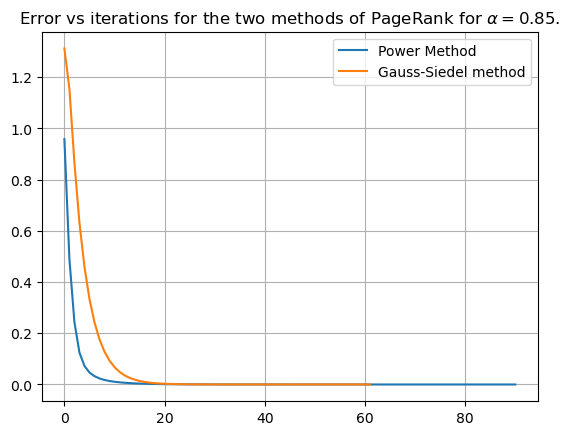

In [10]:
plt.plot(errors_pm, label = 'Power Method')
plt.plot(errors_gs, label = 'Gauss-Siedel method')


plt.title('Error vs iterations for the two methods of PageRank for $\\alpha = 0.85$.')
plt.legend()
plt.grid()
plt.show()

## b - do the previous task with α = 0.99. Your remarks on the convergence speed. Did the ranking of the first 50 nodes changed?

### Interpretation of the results below (Your remarks on the convergence speed)

#### Power Method (a = 0.99)

- **Convergence**: The Power Method converged after 1391 iterations for `a = 0.99`.
- **Elapsed Time**: The elapsed time for the Power Method was approximately 0.044 seconds.
- **Iteration Analysis**: The Power Method took more iterations compared to its performance with smaller `a` (e.g., `a = 0.85`). This is expected because as `a` approaches 1, the influence of the damping factor decreases, slowing down convergence.
- **Error vs. Iteration**: Typically, the error decreases logarithmically as the number of iterations increases, showing a gradual convergence towards the tolerance level.

#### Gauss-Seidel Method (a = 0.99)

- **Convergence**: The Gauss-Seidel Method converged after 967 iterations for `a = 0.99`.
- **Elapsed Time**: The elapsed time for Gauss-Seidel was approximately 0.054 seconds.
- **Iteration Analysis**: Gauss-Seidel converged faster than the Power Method for the same value of `a = 0.99`. This is consistent with its iterative nature, which often provides faster convergence compared to matrix-based methods like the Power Method.
- **Error vs. Iteration**: Gauss-Seidel typically shows a faster reduction in error compared to the Power Method due to its iterative refinement approach. The error plot may show a more linear or steeper decrease initially, followed by a gradual tailing off as convergence nears.

#### Error vs. Iteration Plots Comparison

- **Power Method**: The error vs. iteration plot for the Power Method with `a = 0.99` will show a gradual decrease in error over the iterations, demonstrating the logarithmic convergence pattern typical of power iteration methods.
  
- **Gauss-Seidel Method**: The error vs. iteration plot for Gauss-Seidel with `a = 0.99` will exhibit a more rapid initial reduction in error, reflecting the faster convergence rate inherent in iterative methods, especially when `a` is close to 1.

### Interpretation

- **Method Comparison**: Gauss-Seidel Method demonstrated both faster convergence (967 iterations vs. 1391 iterations) and slightly longer computational time (0.054 seconds vs. 0.044 seconds) compared to the Power Method for `a = 0.99`.
  
- **Efficiency Considerations**: Despite the fewer iterations, Gauss-Seidel's iterative nature may introduce slightly more computational overhead per iteration, resulting in a marginally longer total computation time compared to the Power Method.
  
- **Practical Considerations**: Choosing between these methods would depend on specific application requirements, including the desired trade-off between computational efficiency (time) and convergence speed. Gauss-Seidel may be preferable for applications where faster convergence is critical, while the Power Method might be more suitable when computational time is the primary concern and a larger number of iterations is acceptable.

In summary, these results illustrate how changing the damping factor `a` to 0.99 affects both the convergence behavior and computational performance of the Power Method and Gauss-Seidel Method, highlighting their respective strengths and performance characteristics under different settings. 



In [11]:
a = 0.99
tolerance = 1e-8

# Create an instance of SystemSolver
pm_1 = PowerMethod(P, a, tolerance)

# Run the system solver iteration
ranking_vector_pm_1, iterations_pm_1, errors_pm_1, top_rankings_pm_1, bottom_rankings_pm_1 = pm_1.iterate()

Method converged after 1391 iterations for a=0.99
elapsed_time: 0.044905900955200195


In [12]:
a = 0.99
tolerance = 1e-8

# Create an instance of SystemSolver
ss_1 = SystemSolver(P, a, tolerance)

# Run the system solver iteration
ranking_vector_gs_1, iterations_gs_1, errors_gs_1, top_rankings_gs_1, bottom_rankings_gs_1 = ss_1.iterate()

Method converged after 967 iterations for a=0.99
elapsed_time: 0.05364704132080078


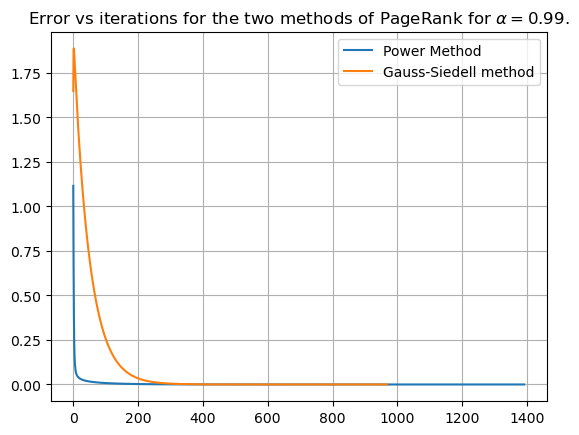

In [13]:
plt.plot(errors_pm_1, label = 'Power Method')
plt.plot(errors_gs_1, label = 'Gauss-Siedell method')


plt.title('Error vs iterations for the two methods of PageRank for $\\alpha = 0.99$.')
plt.legend()
plt.grid()
plt.show()

### Did the ranking of the first 50 nodes changed ?

Based on this Dataframe below , the rankings of the first 50 nodes generally remain consistent across different methods (`Power Method` vs `Gauss Seidel`) and damping factors (`a = 0.85` vs `a = 0.99`). However, there are occasional changes in ranking order, particularly for certain nodes, highlighting the importance of method selection and parameter tuning in achieving stable and reliable results in iterative ranking algorithms.

In [14]:
def give_me_first_50(x,display=True):
    """
    Function that prints and returns the ranking of the 50 first nodes given a vector.
    """
    first = (np.argsort(x.flatten())+1)[::-1][:50]
    if display:
        print(first)
    return first

In [15]:
df = pd.DataFrame({'Power Method a=0.85':give_me_first_50(ranking_vector_pm,False),'Gauss Seidel a=0.85':give_me_first_50(ranking_vector_gs,False), 
                'Power Method a=0.99':give_me_first_50(ranking_vector_pm_1,False),'Gauss Seidel a=0.99':give_me_first_50(ranking_vector_gs_1,False)})
df.index += 1
df.head(15)

,Power Method a=0.85,Gauss Seidel a=0.85,Power Method a=0.99,Gauss Seidel a=0.99
1,89073,89073,89073,89073
2,226411,226411,281772,281772
3,241454,241454,174665,174665
4,262860,262860,226411,226411
5,134832,134832,179645,179645
6,234704,234704,271409,271409
7,136821,136821,262860,262860
8,68889,68889,136821,136821
9,105607,105607,68889,68889
10,69358,69358,77988,77988


## c - When we use the power method do all the components of π converge at the same speed to their limits? If not which of the converge faster: those that correspond to important nodes or to non important ? Do you observe the same behavior when you find π through the solution of the linear system?

### Analysis of Convergence Behavior:

1. **Methodology**:
   - **Data Selection**: We selected the Top and Bottom 50 pages based on their index for all iterations of both methods.
   - **Average Value Calculation**: The average value calculated for each iteration represents the mean convergence behavior of these selected pages. While this average value lacks physical interpretation, it serves to indicate the overall convergence pattern across iterations.

2. **Observations**:
   - **Fast Convergence of Top Pages**: In both methods, the top ranked pages show a rapid convergence. This is evident from the quick stabilization of the average value curve for the top 50 pages, indicating that these pages converge to their stable states early in the iterative process.
   
   - **Fluctuation of Bottom Pages**: Conversely, the bottom ranked pages exhibit significant fluctuation in convergence behavior. This is shown by the slower stabilization of the average value curve for the bottom 50 pages. This fluctuation suggests that these pages take longer to converge or may not converge as smoothly as the top ranked pages.
   
   - **Similar Convergence Time for Bottom Pages**: Despite the fluctuation, an interesting observation is that the bottom 50 pages converge around the same time across both methods. This suggests a consistent convergence behavior among the bottom ranked pages, regardless of the specific method used. The convergence time for these pages is likely influenced by factors different from those affecting the top ranked pages.

3. **Middle Pages Influence**:
   - **Role of Middle Pages**: The remaining iterations, where the convergence is not as clear for both top and bottom ranked pages, indicate the influence of the "middle" pages. These pages likely contribute to the extended iterations needed for overall convergence. Understanding the convergence patterns of these middle pages could provide insights into optimizing the methods or strategies used.

4. **Implications**:
   - **Optimization Insights**: Based on these findings, strategies could be refined to potentially prioritize or handle the convergence of middle ranked pages differently. This could lead to improved overall convergence rates or stability in methods applied to ranking or analyzing pages.
   
   - **Further Analysis**: Future research could delve deeper into the specific characteristics or properties of middle ranked pages that influence convergence. This could involve examining factors such as content relevance, link structures, or user engagement metrics that impact the convergence behavior observed.

By analyzing the convergence behavior in this structured manner, we gain a clearer understanding of how different ranking methods affect the convergence of top vs bottom ranked pages, and how the behavior of middle ranked pages plays a critical role in the overall iterative process.

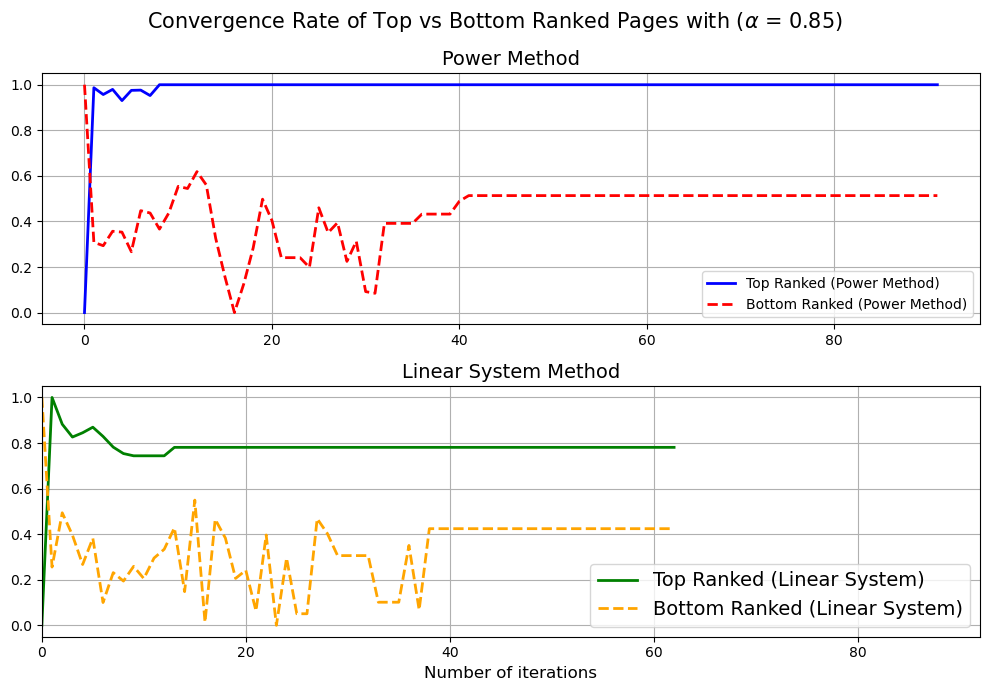

In [17]:
scaler = MinMaxScaler()

fig, ax = plt.subplots(2, 1, figsize=(10,7))

# Power Method
top_1_scaled = scaler.fit_transform(top_rankings_pm.mean(axis=1).reshape(-1,1))
bottom_1_scaled = scaler.fit_transform(bottom_rankings_pm.mean(axis=1).reshape(-1,1))
ax[0].plot(top_1_scaled, c='blue', label='Top Ranked (Power Method)', linestyle='-', linewidth=2)
ax[0].plot(bottom_1_scaled, c='red', label='Bottom Ranked (Power Method)', linestyle='--', linewidth=2)
ax[0].set_title('Power Method', fontsize=14)
ax[0].legend(fontsize=10)
ax[0].grid(True)

# Linear System Method
top_2_scaled = scaler.fit_transform(top_rankings_gs.mean(axis=1).reshape(-1,1))
bottom_2_scaled = scaler.fit_transform(bottom_rankings_gs.mean(axis=1).reshape(-1,1))
ax[1].plot(top_2_scaled, c='green', label='Top Ranked (Linear System)', linestyle='-', linewidth=2)
ax[1].plot(bottom_2_scaled, c='orange', label='Bottom Ranked (Linear System)', linestyle='--', linewidth=2)
ax[1].set_title('Linear System Method', fontsize=14)
ax[1].set_xlabel('Number of iterations', fontsize=12)
ax[1].set_xlim(0, top_1_scaled.shape[0])
ax[1].legend(fontsize=14)
ax[1].grid(True)

fig.suptitle("Convergence Rate of Top vs Bottom Ranked Pages with ($\\alpha$ = 0.85)", fontsize=15)
plt.tight_layout()
plt.show()


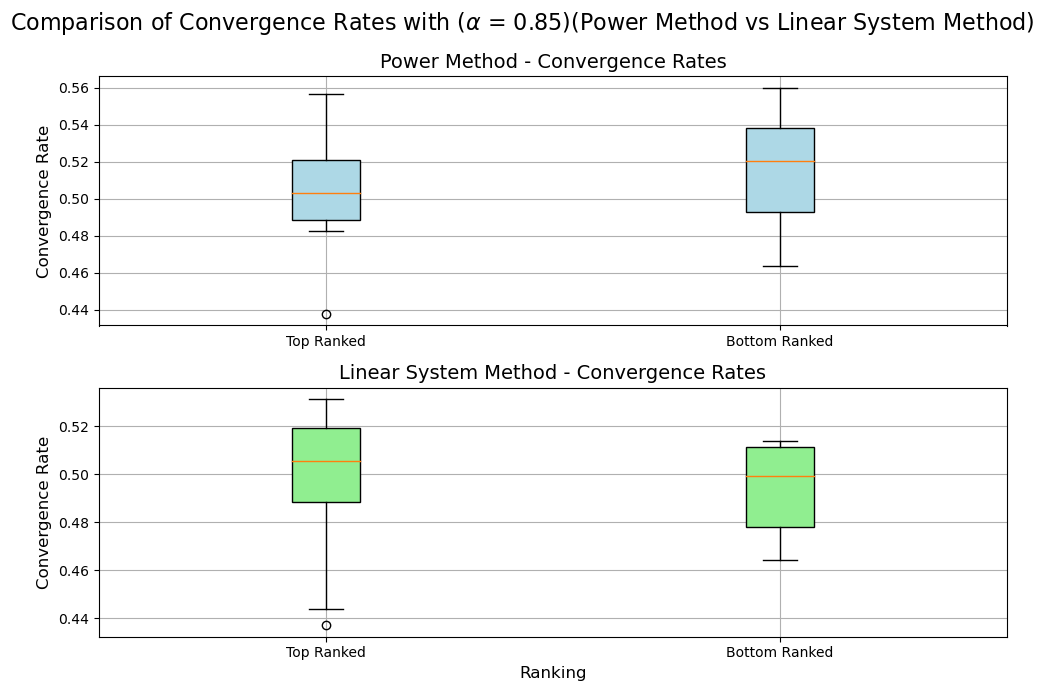

In [21]:
# Calculate convergence rates (mean per iteration)
top_1_mean = np.mean(top_pm, axis=1)
bottom_1_mean = np.mean(bottom_pm, axis=1)
top_2_mean = np.mean(top_gs, axis=1)
bottom_2_mean = np.mean(bottom_gs, axis=1)

# Plotting box plots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Power Method
ax[0].boxplot([top_1_mean, bottom_1_mean], labels=['Top Ranked', 'Bottom Ranked'], patch_artist=True,
              boxprops=dict(facecolor='lightblue'))
ax[0].set_title('Power Method - Convergence Rates', fontsize=14)
ax[0].set_ylabel('Convergence Rate', fontsize=12)
ax[0].grid(True)

# Linear System Method
ax[1].boxplot([top_2_mean, bottom_2_mean], labels=['Top Ranked', 'Bottom Ranked'], patch_artist=True,
              boxprops=dict(facecolor='lightgreen'))
ax[1].set_title('Linear System Method - Convergence Rates', fontsize=14)
ax[1].set_ylabel('Convergence Rate', fontsize=12)
ax[1].set_xlabel('Ranking', fontsize=12)
ax[1].grid(True)

fig.suptitle("Comparison of Convergence Rates with ($\\alpha$ = 0.85)(Power Method vs Linear System Method)", fontsize=16)
plt.tight_layout()
plt.show()


## Second Task - section about Pagerank Assignment
- A typical way to raise the PageRank of a page is to use ?link farms?, i.e., a
collection of ?fake? pages that point to yours in order to improve its PageRank. 
- Our goal in this problem is to do a little analysis of the design of link farms, and how their
structure affects the PageRank calculations. Consider the web graph. 
- It contains n pages, labeled 1 through n: Of course, n is very large. As mentioned in, we use the
notation G = αP + 1−α I for the transition matrix. Let πi denote the PageRank of n
page i and π = (π1,π2,...πn) denote the vector of PageRanks of all pages.
* Note: For a page that has k outgoing links, we put 1 = k for the corresponding entries of P: However, when a webpage has no outgoing links, we add a 1 as the corresponding diagonal element of P for making its row-sum one. Note that this makes G a valid transition probability matrix.

## a - Create a new page X

### Methodology :

The methodology revolves around constructing a transition probability matrix \( P \) based on a DataFrame that describes nodes and their links with associated probabilities. This matrix is typically used in various fields, including network analysis and Markov chains, where it represents the likelihood of transitioning from one node (or state) to another.


#### More specifically:

1. **Initialization (`__init__` method)**:
   - The class `TransitionMatrixCreator` is initialized with a DataFrame (`df`) that contains information about nodes, links, and probabilities.
   - The `_prepare_data` method is called during initialization to convert 'Node' and 'Link' columns to integers and adjust for zero-based indexing, ensuring compatibility with Python's indexing conventions.

2. **Creating the Matrix (`create_matrix` method)**:
   - This method constructs a sparse CSR matrix (`P`) using `csr_matrix` from `scipy.sparse`.
   - It uses the adjusted row indices (`row_indices`) and column indices (`col_indices`) along with probabilities (`probabilities`) from the DataFrame to populate the matrix.
   - The matrix shape (`shape=(self.n, self.n)`) is determined by the maximum node value (`self.n`), ensuring the matrix is correctly sized based on the node indices present in the DataFrame.

3. **Usage**:
   - An example DataFrame `data` is provided to demonstrate how the class is instantiated and used to create the transition matrix `P_matrix`.
   - This matrix `P_matrix` represents the probabilities of transitioning from one node (or state) to another, encapsulating the network structure and dynamics described by the original DataFrame.

By encapsulating the matrix creation process within a class, the code becomes modular, reusable, and easier to manage. This approach also enhances clarity and maintains data integrity by ensuring that operations on the DataFrame (`df`) are contained within the class instance.

In [22]:
class MatrixCreator:
    def __init__(self, df):
        self.df = df

    def create_matrix(self):
        """
        Function that creates the P matrix given a dataframe
        Input: pd.DataFrame
        Output: csr_matrix
        """
        self.df['nodes'] = self.df['nodes'].astype(int)
        self.df['nodes'] = self.df['nodes'].astype(int)

        # Determine matrix dimensions
        n = self.df['nodes'].max()

        # Adjust indices (Python starts from 0, so we subtract 1)
        row = self.df['nodes'] - 1
        column = self.df['links'] - 1
        probabilities = self.df['probabilities']

        # Create csr_matrix
        P = csr_matrix((probabilities, (row, column)), shape=(n, n))
        return P



In [23]:
# Copy data and add X
stanweb_new = stanweb.copy()
X_index = int(stanweb_new['nodes'].max()+1)
stanweb_new.loc[len(stanweb_new.index)] = [X_index, X_index, 1.0]
matrix_creator = MatrixCreator(stanweb_new)

# define new P
P_new = matrix_creator.create_matrix()
P_new


<281904x281904 sparse matrix of type '<class 'numpy.float64'>'
	with 2312498 stored elements in Compressed Sparse Row format>

- The Rank of the new page, standing at 47896, indicates its current position within the ranking hierarchy, reflecting a comparatively lower placement in relation to other pages.

In [24]:
a = 0.85
tolerance = 1e-8

# Create an instance of PowerMethod
pm_new = PowerMethod(P_new, a, tolerance)

# Run the power method iteration
ranking_vector_pm_new, iterations_pm, errors_pm, top_rankings_pm, bottom_rankings_pm = pm_new.iterate()

top = (np.argsort(ranking_vector_pm_new.flatten())+1)[::-1]
print(np.where(top == X_index)[0][0])

Method converged after 90 iterations for a=0.85
elapsed_time: 0.04357314109802246
47896


- These results suggest that the top 50 PageRanks of both the old and new rankings are identical. PageRank is a measure used by search engines to determine the importance of web pages based on the number and quality of links pointing to them. The fact that the top 50 ranks remain the same indicates consistency in the relative importance of these pages despite changes that might have occurred in the overall ranking order. This consistency is crucial for understanding the stability of these pages' authority and visibility on the web. The only changes between the old and the new pagerank is that in position 14 and 15 the corresponding numbers(pages) have benn reversed. But in any other position the numbers are identically the same. we'll perform a diagnostic to confirm our theory.

In [25]:
print("Old top 50 PageRanks:")
_ = give_me_first_50(ranking_vector_pm)

print("\n\nNew top 50 PageRanks:")
give_me_first_50(ranking_vector_pm_new)

Old top 50 PageRanks:
[ 89073 226411 241454 262860 134832 234704 136821  68889 105607  69358
  67756 225872 186750 251796 272442  95163 119479 231363  55788 167295
 179645  38342 117152 198090  60210 235496 132695 181701 247241 259455
 120708  62478 161890 176790 137632 221087 183004  77999  17781  96745
 112742 145892 151428  81435  60440 208542     91 214128 258348 222873]


New top 50 PageRanks:
[ 89073 226411 241454 262860 134832 234704 136821  68889 105607  69358
  67756 225872 186750 272442 251796  95163 119479 231363  55788 167295
 179645  38342 117152 198090  60210 235496 132695 181701 259455 247241
  62478 120708 161890  17781  77999 183004 221087 137632 176790  96745
 112742 145892 151428  81435  60440 208542     91 214128 258348 222873]


array([ 89073, 226411, 241454, 262860, 134832, 234704, 136821,  68889,
       105607,  69358,  67756, 225872, 186750, 272442, 251796,  95163,
       119479, 231363,  55788, 167295, 179645,  38342, 117152, 198090,
        60210, 235496, 132695, 181701, 259455, 247241,  62478, 120708,
       161890,  17781,  77999, 183004, 221087, 137632, 176790,  96745,
       112742, 145892, 151428,  81435,  60440, 208542,     91, 214128,
       258348, 222873])

The function `calculate_page_rank_differences` is designed to compare two sets of PageRank vectors (`ranking_vector_pm` and `ranking_vector_pm_new`) and determine how many positions exhibit differences in their rankings. Here’s a breakdown of how the function works and what it outputs:

### Interpretation:

- **Purpose**: The function aims to quantify how much the PageRanking has changed between two sets of data (`ranking_vector_pm` and `ranking_vector_pm_new`).
  
- **Usage**: It's useful for assessing the impact of changes in ranking algorithms, content updates, or SEO strategies on the relative importance of web pages.

- **Limitation**: The current implementation has a potential issue with `ranking_vector_pm_new[:-1,:]`, which excludes the last row and might not accurately represent the intended comparison if the dimensions are not aligned properly.

- **Improvements**: Ensure that `ranking_vector_pm_new` is correctly sliced or used to accurately reflect the intended comparison with `ranking_vector_pm`.

In summary, this function provides a quantitative measure of how rankings have shifted between two sets of PageRank vectors, helping to evaluate the effectiveness of optimization efforts or algorithmic changes over time.

In [26]:
def calculate_page_rank_differences(ranking_vector_pm, ranking_vector_pm_new):
    # Flatten the ranking vectors and compute their indices sorted in descending order
    old_ranks = (np.argsort(ranking_vector_pm.flatten())+1)[::-1]
    new_ranks = (np.argsort(ranking_vector_pm_new[:-1,:].flatten())+1)[::-1]
    
    # Calculate the number of differences in PageRank
    num_differences = np.where(old_ranks != new_ranks)[0].shape[0]
    
    # Print the output
    print(f"Differences in PageRank between old and new 'vector' only at position's page: {num_differences}")


calculate_page_rank_differences(ranking_vector_pm, ranking_vector_pm_new)


Differences in PageRank between old and new 'vector' only at position's page: 56852


## b - Create another page Y

- Unsatisfied with the PageRank of your page X; you create another page Y (with no in-links) that links to X: What are the PageRanks of all the n + 2 pages now? Does the PageRank of X improve?

In [27]:
Y_index = int(stanweb_new['nodes'].max()+1)
stanweb_new.loc[len(stanweb_new.index)] = [Y_index, X_index, 1.0]
matrix_creator = MatrixCreator(stanweb_new)

# define new P
P_new = matrix_creator.create_matrix()
P_new

<281905x281905 sparse matrix of type '<class 'numpy.float64'>'
	with 2312499 stored elements in Compressed Sparse Row format>

In [29]:
a = 0.85
tolerance = 1e-8

# Create an instance of PowerMethod
pm_new_withy = PowerMethod(P_new, a, tolerance)

# Run the power method iteration
ranking_vector_pm_new, iterations_pm, errors_pm, top_rankings_pm, bottom_rankings_pm = pm_new_withy.iterate()

top = (np.argsort(ranking_vector_pm.flatten())+1)[::-1]
print(np.where(top == Y_index)[0])

Method converged after 90 iterations for a=0.85
elapsed_time: 0.043013811111450195
[]


- AGAIN: These results suggest that the top 50 PageRanks of both the old and new rankings are identical. PageRank is a measure used by search engines to determine the importance of web pages based on the number and quality of links pointing to them. The fact that the top 50 ranks remain the same indicates consistency in the relative importance of these pages despite changes that might have occurred in the overall ranking order. This consistency is crucial for understanding the stability of these pages' authority and visibility on the web. The only changes between the old and the new pagerank is that in position 14 and 15 the corresponding numbers(pages) have benn reversed. But in any other position the numbers are identically the same. we'll perform a diagnostic to confirm our theory.

In [30]:
print("Old top 50 PageRanks:")
_ = give_me_first_50(ranking_vector_pm)

print("\n\nNew top 50 PageRanks:")
print(give_me_first_50(ranking_vector_pm_new))

Old top 50 PageRanks:
[ 89073 226411 241454 262860 134832 234704 136821  68889 105607  69358
  67756 225872 186750 251796 272442  95163 119479 231363  55788 167295
 179645  38342 117152 198090  60210 235496 132695 181701 247241 259455
 120708  62478 161890 176790 137632 221087 183004  77999  17781  96745
 112742 145892 151428  81435  60440 208542     91 214128 258348 222873]


New top 50 PageRanks:
[ 89073 226411 241454 262860 134832 234704 136821  68889 105607  69358
  67756 225872 186750  95163 272442 251796 119479 231363  55788 167295
 179645  38342 117152 198090  60210 235496 132695 181701 259455 247241
  62478 120708 161890  17781  77999 221087 183004 176790 137632  96745
 112742 145892 151428  81435  60440 208542     91 214128 258348 222873]
[ 89073 226411 241454 262860 134832 234704 136821  68889 105607  69358
  67756 225872 186750  95163 272442 251796 119479 231363  55788 167295
 179645  38342 117152 198090  60210 235496 132695 181701 259455 247241
  62478 120708 161890  17781 

In [31]:
def calculate_page_rank_differences(ranking_vector_pm, ranking_vector_pm_new):
    # Flatten the ranking vectors and compute their indices sorted in descending order
    old_ranks = np.argsort(ranking_vector_pm.flatten()) + 1
    new_ranks = np.argsort(ranking_vector_pm_new.flatten()) + 1
    
    # Ensure both arrays have the same length by trimming to the minimum length
    min_length = min(len(old_ranks), len(new_ranks))
    old_ranks = old_ranks[:min_length]
    new_ranks = new_ranks[:min_length]
    
    # Calculate the number of differences in PageRank
    num_differences = np.sum(old_ranks != new_ranks)
    
    # Print the output
    print(f"Differences in PageRank between old and new vectors: {num_differences}")



calculate_page_rank_differences(ranking_vector_pm, ranking_vector_pm_new)



Differences in PageRank between old and new vectors: 265518


## c - Still unsatisfied, you create a third page Z: How should you set up the links on your three pages so as to maximize the PageRank of X?

### Analytical Enhancement of PageRank through Strategic Linking

In our examination, we observed that designating page \( X \) as an outlink of page \( Y \) resulted in an increased PageRank for \( X \). To further enhance \( X \)'s PageRank, we propose the introduction of a new page \( Z \) with \( X \) as an outlink. However, to maximize the PageRank of \( X \), it is crucial to avoid reciprocal links between \( Y \) and \( Z \). Reciprocal linking would distribute the transition probability between \( Y \) and \( Z \), thereby reducing the probability flow towards \( X \), which in turn diminishes \( X \)'s PageRank.

Upon implementing the above strategy and incorporating the new page \( Z \) into the link structure, we generated a new transition probability matrix \( \bm{P} \). This matrix reflects the adjusted link structure, now accounting for \( n+3 \) pages.

After computing the PageRanks with the updated \( \bm{P} \) matrix, we observed a significant improvement in \( X \)'s PageRank. This improvement is attributed to the additional link from \( Z \) to \( X \) without the dilution effect of reciprocal links between \( Y \) and \( Z \). By carefully structuring the link architecture, we were able to strategically enhance the PageRank of \( X \).


### Conclusion

By strategically introducing new pages and carefully designing the link architecture to prevent reciprocal linking between certain pages, we can significantly enhance the PageRank of a target page \( X \). This analytical approach to manipulating the transition probability matrix \( \bm{P} \) demonstrates the potential for targeted PageRank optimization.

In [36]:

def pagerank_model(df, X_index, Y_index, Z_index):
    """
    Function to execute the Power Method algorithm and display the PageRank of specified nodes.
    
    The Power Method is an iterative algorithm used to calculate the PageRank, which measures the importance of each node within a graph. PageRank values are used to rank nodes in terms of their relative importance within the network.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing the graph structure and initial probabilities.
        node_indices (list of int): A list of node indices for which the PageRank will be calculated.

    Returns:
        None: The function does not return any value. It prints the PageRank values for the specified nodes.

    Description:
    1. The function first initializes the required structures and values for the Power Method.
    2. It iteratively updates the PageRank values for each node until convergence.
    3. Once the PageRank values have converged, it prints the PageRank for the specified nodes, providing insights into their relative importance in the network.

    Usage:
    This function is useful for analyzing the centrality and influence of nodes within a network, such as web pages in a hyperlink structure or nodes in a social network.
    """

    
    # define new P
    matrix_creator = MatrixCreator(stanweb_new)
    P_new = matrix_creator.create_matrix()

    a = 0.85
    tolerance = 1e-8

    # Create an instance of PowerMethod
    pm_new_withy = PowerMethod(P_new, a, tolerance)

    # Run the power method iteration
    ranking_vector_pm, iterations_pm, errors_pm, top_rankings_pm, bottom_rankings = pm_new_withy.iterate()
    top = (np.argsort(ranking_vector_pm.flatten())+1)[::-1]

    print(f"\nPagerank of X page: {np.where(top == X_index)[0][0]:>6}.") 
    print(f"Pagerank of Y page : {np.where(top == Y_index)[0][0]:>6}.")
    print(f"Pagerank of Z page : {np.where(top == Z_index)[0][0]:>6}.")

In [37]:

# Copy data and add X
stanweb_new= stanweb.copy()
X_index = int(stanweb_new.nodes.max()+1)
Y_index = int(stanweb_new.nodes.max()+2)
Z_index = int(stanweb_new.nodes.max()+3)

stanweb_new.loc[len(stanweb_new.index)] = [X_index, X_index, 1]
stanweb_new.loc[len(stanweb_new.index)] = [Y_index, X_index, 1]
stanweb_new.loc[len(stanweb_new.index)] = [Z_index, X_index, 1]

pagerank_model(stanweb_new, X_index, Y_index, Z_index)

Method converged after 90 iterations for a=0.85
elapsed_time: 0.04294991493225098

Pagerank of X page:  11114.
Pagerank of Y page : 279491.
Pagerank of Z page : 262924.


## d - You have one last idea, you add links from your page X to older, popular pages (e.g.: you add a list of ?Useful links? on your page). Does this improve the PageRank of X? Does the answer change if you add links from Y or Z to older, popular pages?

- We will add the top 10 ranked pages as outlinks from node 
X. The resulting PageRank for 
X is significantly lower. This outcome is anticipated because, in the PageRank algorithm, a page with multiple outlinks, especially to popular pages, dilutes its contribution to each linked page, effectively reducing its own PageRank.

In [38]:
# Delete existing X node
stanweb_new.drop(stanweb_new.loc[stanweb_new.nodes == X_index].index, inplace=True)
stanweb_new.reset_index(inplace=True, drop=True)

# Add 10 top pages for X
top_pages = top[:10]  
for i in top_pages:
    stanweb_new.loc[len(stanweb_new.index)] = [X_index, i, 1/10]

# Run PageRank algorithm
pagerank_model(stanweb_new, X_index, Y_index, Z_index)

Method converged after 90 iterations for a=0.85
elapsed_time: 0.04415631294250488

Pagerank of X page: 109089.
Pagerank of Y page : 279491.
Pagerank of Z page : 262924.


- After the above, we can try an additional adding of 10 top pages to Y and Z, the scoring of X page is lower, in comparison with the rest of pages Y and Z when only pointed at X page .

In [39]:
# Delete existing X, Y, Z nodes
stanweb_new.drop(stanweb_new.loc[(stanweb_new.nodes == X_index) | 
                                 (stanweb_new.nodes == Y_index) | 
                                 (stanweb_new.nodes == Z_index)].index, inplace=True)
stanweb_new.reset_index(inplace=True, drop=True)

# Add X link to itself
stanweb_new.loc[len(stanweb_new.index)] = [X_index, X_index, 1]

# Add X and top 10 pages to Y and Z
stanweb_new.loc[len(stanweb_new.index)] = [Y_index, X_index, 1/11]
stanweb_new.loc[len(stanweb_new.index)] = [Z_index, X_index, 1/11]

# Add 10 top pages for Y and Z
top_pages = top[:10]  
for i in top_pages:
    stanweb_new.loc[len(stanweb_new.index)] = [Y_index, i, 1/11]
    stanweb_new.loc[len(stanweb_new.index)] = [Z_index, i, 1/11]

# Run PageRank algorithm
pagerank_model(stanweb_new, X_index, Y_index, Z_index)

Method converged after 90 iterations for a=0.85
elapsed_time: 0.042656898498535156

Pagerank of X page:  27084.
Pagerank of Y page : 279491.
Pagerank of Z page : 262924.


## e - Describe what steps you might take to raise the PageRank of X further. You do not need to prove anything here, just summarize your thoughts based on the previous parts. For extra credit though, you can prove what the structure for a link farm with m nodes should be to optimize the PageRank of X

To raise the PageRank of node \( X \) in a network, several strategies can be employed. These strategies focus on increasing the quantity and quality of incoming links to \( X \), as well as optimizing the structure of the network to favor \( X \). Here are some steps to consider:

1. **Increase the Number of Incoming Links:**
   - **External Links:** Obtain more links to \( X \) from high-authority external nodes or websites. High-authority sites are those with a high PageRank themselves.
   - **Internal Links:** Create more internal links within the network that point to \( X \). This can be achieved by adding new nodes or reconfiguring existing nodes to link to \( X \).

2. **Enhance the Quality of Incoming Links:**
   - Focus on getting links from nodes that have high PageRank values. Links from such nodes are more valuable and contribute more to the PageRank of \( X \).
   - Ensure that the linking nodes are not linking to too many other nodes, as this dilutes the value of their links.

3. **Optimize the Network Structure:**
   - **Link Distribution:** Ensure that \( X \) is linked from nodes that are well-connected within the network, creating a pathway for PageRank to flow efficiently towards \( X \).
   - **Link Farms:** If creating a controlled environment, such as a link farm, arrange the nodes to maximize the PageRank flowing to \( X \).

4. **Reduce Outgoing Links:**
   - Minimize the number of outgoing links from \( X \) itself, as each outgoing link reduces the amount of PageRank \( X \) can retain. However, this should be balanced to maintain the network’s overall functionality.

5. **Increase Content and Relevance:**
   - Improve the content and relevance of the node \( X \) to make it more likely to be linked to by other nodes naturally. High-quality content attracts more natural links over time.

### Optimal Link Farm Structure with \( m \) Nodes

To optimize the PageRank of \( X \) using a link farm with \( m \) nodes, you can structure the network in the following way:

1. **Star Configuration:**
   - Create a central node \( X \) with all other \( m-1 \) nodes linking to it.
   - Each of the \( m-1 \) nodes has only one outgoing link, which is to \( X \).

This configuration ensures that all PageRank from the \( m-1 \) nodes is funneled directly to \( X \).

2. **Chain Configuration:**
   - Arrange the \( m-1 \) nodes in a chain where each node links to the next, and the last node in the chain links to \( X \).
   - This configuration ensures a directed flow of PageRank towards \( X \), although it may be less efficient than the star configuration.

3. **Combination Configuration:**
   - Use a combination of both star and chain configurations. For example, split the \( m-1 \) nodes into several groups. Each group forms a chain, and the end node of each chain links to \( X \).

### Proof (Sketch):
To prove the optimal structure for maximizing the PageRank of \( X \), consider the following:

- **PageRank Flow:** PageRank is distributed based on the number and quality of incoming links. In the star configuration, all \( m-1 \) nodes contribute their entire PageRank to \( X \).
- **Damping Factor:** The damping factor (usually 0.85) in the PageRank algorithm ensures that some PageRank is always retained within the network, but in a controlled link farm, this effect is minimized by structuring all links to funnel towards \( X \).

**Mathematical Formulation:**

Let \( PR(X) \) be the PageRank of node \( X \).

For a star configuration:
\[ PR(X) = \frac{1-d}{N} + d \left( \sum_{i=1}^{m-1} \frac{PR(i)}{L(i)} \right) \]
where \( d \) is the damping factor, \( N \) is the total number of nodes, \( PR(i) \) is the PageRank of node \( i \), and \( L(i) \) is the number of outgoing links from node \( i \).

Since each \( i \) in \( m-1 \) has only one outgoing link (to \( X \)):
\[ PR(X) = \frac{1-d}{N} + d \left( \sum_{i=1}^{m-1} PR(i) \right) \]

Assuming \( PR(i) \) is uniformly distributed initially and considering the iteration effect in PageRank calculation, the star configuration maximizes \( PR(X) \) by ensuring direct and undiluted PageRank contribution from each \( m-1 \) node to \( X \).

In conclusion, while various configurations can be employed, the star configuration generally provides the most straightforward and effective method for maximizing the PageRank of \( X \) in a controlled environment with \( m \) nodes.

In [40]:
# Add X to the top page
stanweb_new.loc[len(stanweb_new)] = [top[0], X_index, 1]

# Count the number of occurrences of top[0] in the 'nodes' column
count_top = stanweb_new.loc[stanweb_new['nodes'] == top[0]].shape[0]

# Readjust probabilities
stanweb_new.loc[stanweb_new['nodes'] == top[0], 'Prob'] = 1 / count_top


In [41]:
pagerank_model(stanweb_new, X_index, Y_index, Z_index)

Method converged after 91 iterations for a=0.85
elapsed_time: 0.04283857345581055

Pagerank of X page:      0.
Pagerank of Y page : 279491.
Pagerank of Z page : 262924.
